<a href="https://colab.research.google.com/github/RafaelCaballero/BME/blob/main/mfia/ejemplos/logrend.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[*********************100%***********************]  1 of 1 completed


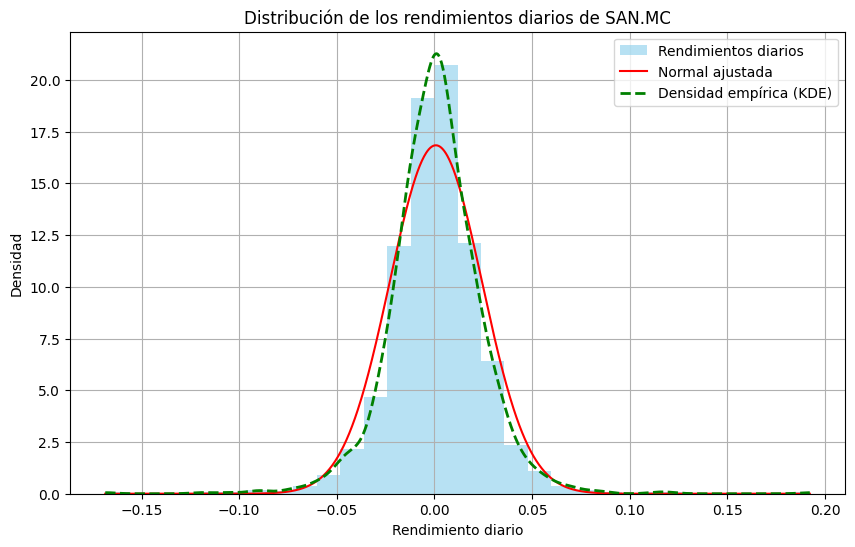

In [3]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import norm, gaussian_kde

def muestra_valor(valor):
    # 1. Carga de datos con yahoo finance (ticker SAN.MC)
    datos = yf.download(valor, start="2020-01-01")

    # 2. preprocesado: preparar rendimientos
    #datos['Rendimiento'] = np.log(datos['Close'] / datos['Close'].shift(1))
    datos['Rendimiento'] = datos['Close'].pct_change()
    rendimientos = datos['Rendimiento'].dropna()

    # 3. Estadísticas: Calcular media y desviación típica
    media = rendimientos.mean()
    desviacion = rendimientos.std()

    # 4. Simular una normal. Crear valores x para la curva normal
    x = np.linspace(rendimientos.min(), rendimientos.max(), 1000)
    curva_normal = norm.pdf(x, loc=media, scale=desviacion)

    # 5. Calcular la densidad empírica suavizada (KDE)
    kde = gaussian_kde(rendimientos)
    curva_kde = kde(x)

    # 5. Dibujar histograma + curva normal + densidad empírica
    plt.figure(figsize=(10, 6))
    plt.hist(rendimientos, bins=30, density=True, alpha=0.6, color='skyblue', label='Rendimientos diarios')
    plt.plot(x, curva_normal, 'r-', label='Normal ajustada')
    plt.plot(x, curva_kde, 'g--', linewidth=2, label='Densidad empírica (KDE)')
    plt.title(f"Distribución de los rendimientos diarios de {valor}")
    plt.xlabel("Rendimiento diario")
    plt.ylabel("Densidad")
    plt.legend()
    plt.grid(True)
    plt.show()

muestra_valor("SAN.MC")

[*********************100%***********************]  1 of 1 completed


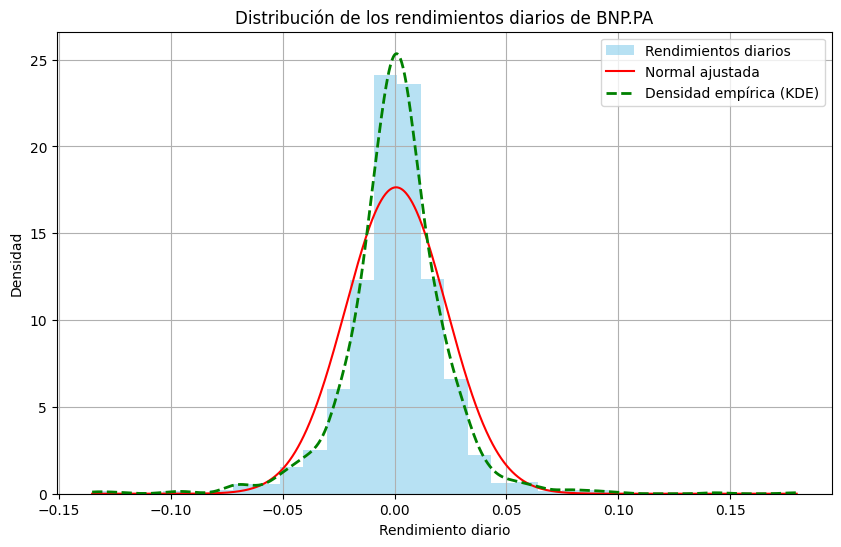

In [4]:
muestra_valor("BNP.PA")